<a href="https://colab.research.google.com/github/Awalilly/DataMining2023/blob/main/Model_selection_S4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt

path_data = 'MyDrive/Colab Notebooks/data/DataMiningProject/Preprocessed/'
path_mount = '/content/drive/'

In [ ]:
from google.colab import drive
drive.mount(path_mount)

Mounted at /content/drive/


# Paziente S4 - dati unbalanced (88% vs 12%)

## Definizione dei Dataset

In [ ]:
subject = "S4"
file_path = os.path.join(path_mount, path_data, subject)
df = pd.read_json(file_path + "_eeg.json")
df.head()

,epoch,condition,Fz,C3,Cz,C4,Pz,PO7,Oz,PO8
0,0,0,"[1.9249565042, 0.0949738894, -0.9422494844, -1...","[-1.8775547081, -1.7177038463, -1.1903673646, ...","[-2.4849622849, -3.277082452, -3.7747507359, -...","[0.4879709049, 1.2640916664000001, 1.851953854...","[-3.585547541, -2.6911806202, -1.8808397665, -...","[0.5537893365000001, 0.611394758, 0.3594605756...","[-0.2045038931, 0.3923876867, 0.52018411, 0.23...","[5.1858516814, 5.3231189181, 5.0566088118, 4.2..."
1,1,1,"[-2.8460998694, -1.9835247263, -1.0859625802, ...","[2.8247604499000003, 3.3895838916, 3.142858251...","[-1.8569242185000001, -2.1029123518, -2.092896...","[-2.0478299841, -2.4733822075000003, -2.001556...","[2.4579422566, 2.0192397154, 1.6497446302, 1.3...","[2.760842053, 4.1121992726, 4.3386629001, 3.32...","[-0.8538244146, -1.2581237249, -1.7333055526, ...","[-0.4388662728, -1.7030798689000002, -2.217545..."
2,2,0,"[2.5491810007, 3.5200899271, 3.9312253227, 3.5...","[1.1283034608, 1.6621317511, 2.0179260753, 2.1...","[-0.4443867353, -0.0594772744, 0.4022558524, 0...","[4.8220671482, 4.7471049282, 4.2272520221, 3.4...","[-2.0675218136, -2.1981588392, -2.0062639955, ...","[-2.8399958779, -2.6298084694, -2.322104994, -...","[-3.8564570939, -3.9811147088, -3.8680058399, ...","[0.7088099109, -1.0607673147, -2.3822844431, -..."
3,3,0,"[5.3651743359, 6.9812859993, 8.1764198115, 8.5...","[-0.0364798277, -1.0064007473, -2.1503404633, ...","[1.3171461470999999, 1.7972088587, 1.847118012...","[2.0051131605, 1.7986790242000001, 1.449073179...","[0.07414792740000001, -0.24441571880000001, -0...","[-4.0702854248, -4.5518800819, -4.5002091436, ...","[-1.0087098763, -0.8014223186, -0.0934652587, ...","[-3.6461064421, -3.9730550155, -4.2212984266, ..."
4,4,1,"[-5.0270923442, -5.6959658628, -5.8752652619, ...","[-7.1279672888, -7.1528686274, -6.1269346395, ...","[-1.0397905144, -1.0775570749, -0.7349574261, ...","[-0.9489855504, -0.7391041063, -0.5187617423, ...","[2.4498595964, 2.1338872395, 1.7921376621, 1.3...","[2.1085294613, 2.2888127265, 2.3820081721, 2.3...","[6.7005018593, 6.8796215323, 6.2379324571, 5.0...","[2.8849447809, 3.3631741731, 2.8438407784, 1.6..."


*Costruzione matrice della features*

`X` è la matrice delle *features* di dimensione 1200 x 2808 in cui vengono salvati i dati dopo essere stati standardizzati. In `y` sono inserite le *label* dei dati.

In [ ]:
unicorn_channels = ["Fz", "C3", "Cz", "C4", "Pz", "PO7", "Oz", "PO8"]
pot = df[unicorn_channels].to_numpy()

s = np.zeros(1)
X = np.zeros(2808)

for i in range(pot.shape[0]):
  for j in range(pot.shape[1]):
    temp = np.array(pot[i,j])
    temp = (temp - np.mean(temp)) / np.std(temp)

    s = np.append(s, temp)

  X = np.vstack((X, s[1:]))
  s = np.zeros(1)

y = df.condition.to_numpy()

In [ ]:
X = X[1:,:]
X.shape

(1200, 2808)

In [ ]:
y.shape

(1200,)

*Suddivisione dei dati tra set di training, set di validazione e set di test*

Il dataset viene suddiviso in:


*   `X_train` e `y_train`: dataset di training;
*   `X_test` e `y_test`: dataset di test contenente il 20% dei dati originali;
*   `X_val` e `y_val`: dataset di test di validazione, che contiene il 20% dei dati di training.


In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Suddivisione del dataset in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Suddivisione del dataset in set di training e validazione
X_train_original, X_val, y_train_original, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

In [ ]:
X_train = X_train_original
y_train = y_train_original

Il dataset di training risulta essere fortemente sbilanciato: i dati con label *Non-Target* (NT) sono superiori di quelli *Target* (T).

In [ ]:
class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  87.5 % e quella di T è 12.5 %. E in termini assoluti: Counter({0: 672, 1: 96})


## **Model selection**

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

La fase di *model selection* è strutturata come segue:


1.   Ogni modello è allenato con il dataset di training;
2.   Si stima il `roc_auc` score su *10 Fold Cross Validation*;
3.   Si utilizza `grid_search` per individuare gli iperparametri che consentono di ottimizzare il modello;
4.   Si valutano le prestazioni del *best model* con diversi score e si produce la *Confusion Matrix*.



Gli score utillizati in questa sezione sono:


*   **ROC AUC** (Receiver Operating Characteristic Area Under the Curve): la curva ROC rappresenta la relazione tra il tasso di veri positivi (True Positive Rate, TPR) e il tasso di falsi positivi (False Positive Rate, FPR) al variare della soglia di classificazione. L'area sotto la curva ROC (AUC) fornisce una stima complessiva delle prestazioni del classificatore, dove un valore più vicino a 1 indica una migliore capacità di classificazione.

*   **Accuracy** (Accuratezza): è una misura della percentuale di previsioni corrette rispetto al numero totale di previsioni. È un indicatore generale delle prestazioni del classificatore, calcolato come il rapporto tra il numero di previsioni corrette e il numero totale di campioni.

*   **F1-score**: combina la precisione e il richiamo (recall) del classificatore. È utile quando ci interessa un equilibrio tra precisione e richiamo. L'F1-score è il valore medio armonico di precisione e richiamo ed è calcolato come: 2 * (precision * recall) / (precision + recall). Assume valori compresi tra 0 e 1, dove 1 indica il miglior punteggio possibile.

*   **Precision** (Precisione): la proporzione di istanze positive correttamente identificate rispetto a tutte le istanze identificate come positive dal classificatore. È calcolata come il rapporto tra i veri positivi e la somma dei veri positivi e dei falsi positivi.

*   **Recall** (Richiamo): la proporzione di istanze positive correttamente identificate rispetto al numero totale di istanze positive effettive. È calcolato come il rapporto tra i veri positivi e la somma dei veri positivi e dei falsi negativi.




La *Confusion Matrix* è una matrice 2 x 2, dove le righe rappresentano le etichette di classe reali e le colonne rappresentano le previsioni del modello. Gli scenari possibili sono quattro: True Positive (TP), False Negative (FN), True negative (TN) e False positive (FP).

Ecco un esempio di com'è strutturata una confusion matrix:


```
               | Predetto Positivo | Predetto Negativo |
-------------------------------------------------------
Vero Positivo  |       TP          |       FN          |
-------------------------------------------------------
Vero Negativo  |       FP          |       TN          |
```
Se il modello funziona bene i valori lungo la diagonale saranno più elevati delle altre caselle.


Per poter fare delle considerazioni aggiuntive sulle prestazioni di ogni modello su dati *unbalanced* e *balanced* i valori di ciscuna metrica vengono salvati all'interno della matrice `S4_result`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### **S4 (88% vs 12%) 1. Logistic Regression**

In [ ]:
LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()
print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.9513827919227392


Migliori parametri: {'C': 0.007368423684210527}
ROC AUC: 0.9627976190476191
Accuracy: 0.9322916666666666
F1-score: 0.6976744186046512
Precision: 0.7894736842105263
Recall: 0.625
CPU times: user 38.4 s, sys: 15.4 s, total: 53.8 s
Wall time: 41 s


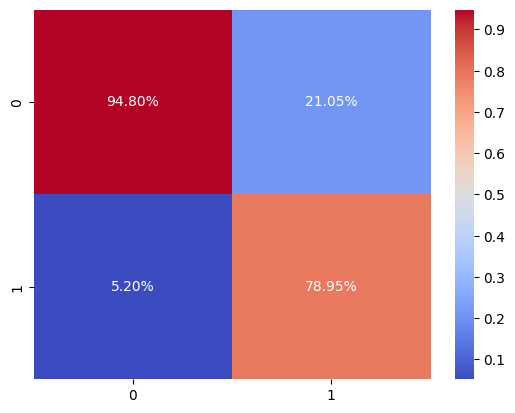

In [ ]:
%%time
parameters = {'C': np.linspace(1e-8, 0.01, 20)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

In [ ]:
S4_result = metrics

### **S4 (88% vs 12%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9305577504633694
CPU times: user 30.6 s, sys: 0 ns, total: 30.6 s
Wall time: 30.8 s


In [ ]:
np.linspace(80, 150, 35).astype(int)

array([ 80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 115, 117, 119, 121, 123, 125, 127, 129, 131,
       133, 135, 137, 139, 141, 143, 145, 147, 150])

Migliori parametri: {'n_estimators': 122}
ROC AUC: 0.9033978174603176
Accuracy: 0.9166666666666666
F1-score: 0.5294117647058825
Precision: 0.9
Recall: 0.375
CPU times: user 2min 36s, sys: 0 ns, total: 2min 36s
Wall time: 2min 38s


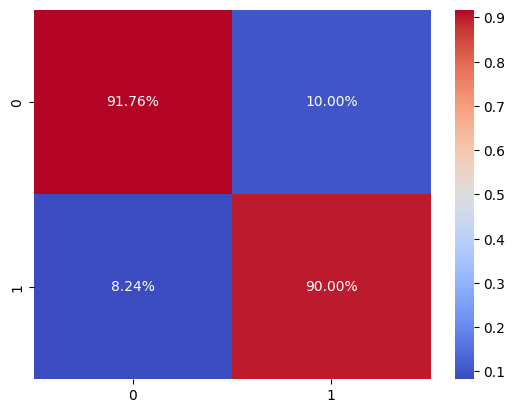

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(119, 122, 4).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']

# Addestro il modello con il miglior parametro
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / (float(np.sum(cf_matrix[:,j])) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

### **S4 (88% vs 12%) 3. Naive Bayes**

Il modello Naive Bayes prende come input solo dati positivi, pertanto è necessario traslare i dati come segue.

In [ ]:
s = np.zeros(1)
X_bayes = np.zeros(2808)

for i in range(pot.shape[0]):
  for j in range(pot.shape[1]):
    temp = np.array(pot[i,j])
    temp = (temp - np.mean(temp)) / np.std(temp)
    temp = temp - np.min(temp)

    s = np.append(s, temp)

  X_bayes = np.vstack((X_bayes, s[1:]))
  s = np.zeros(1)


X_bayes = X_bayes[1:,:]
y_bayes = df.condition.to_numpy()

In [ ]:
print(X_bayes.shape, y_bayes.shape)

(1200, 2808) (1200,)


In [ ]:
# Suddivisione del dataset in set di training e test
X_bayes_train, X_bayes_test, y_bayes_train, y_bayes_test = train_test_split(X_bayes, y_bayes, test_size = 0.2, random_state = 42, stratify = y_bayes)

# Suddivisione del dataset in set di training e validazione
X_bayes_train_original, X_bayes_val, y_bayes_train_original, y_bayes_val = train_test_split(X_bayes_train, y_bayes_train, test_size = 0.2, random_state = 42, stratify = y_bayes_train)

In [ ]:
X_bayes_train = X_bayes_train_original
y_bayes_train = y_bayes_train_original

#### *MultiNB*

In [ ]:
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)
print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.927704370305336


Migliori parametri: {'alpha': 6.106130653266332}
ROC AUC: 0.9064980158730158
Accuracy: 0.859375
F1-score: 0.5846153846153846
Precision: 0.4634146341463415
Recall: 0.7916666666666666
CPU times: user 44.6 s, sys: 22.1 s, total: 1min 6s
Wall time: 40.5 s


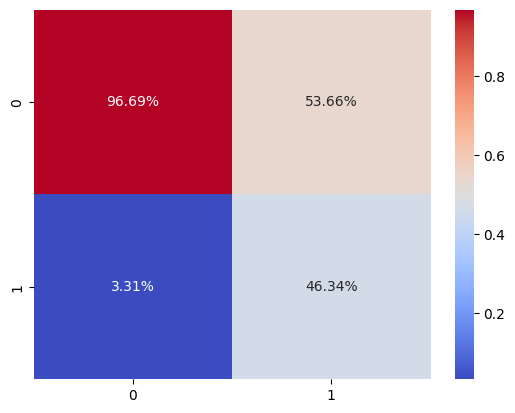

In [ ]:
%%time

# GridSearchCV
parameters = {'alpha': np.linspace(6.10, 6.11, 200)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

Multi_NB.alpha =  grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

#### *Complement NB*

In [ ]:
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.9271239391278898


Migliori parametri: {'alpha': 2.7845454545454547}
ROC AUC: 0.9062499999999999
Accuracy: 0.859375
F1-score: 0.5846153846153846
Precision: 0.4634146341463415
Recall: 0.7916666666666666
CPU times: user 22 s, sys: 10.8 s, total: 32.8 s
Wall time: 19.5 s


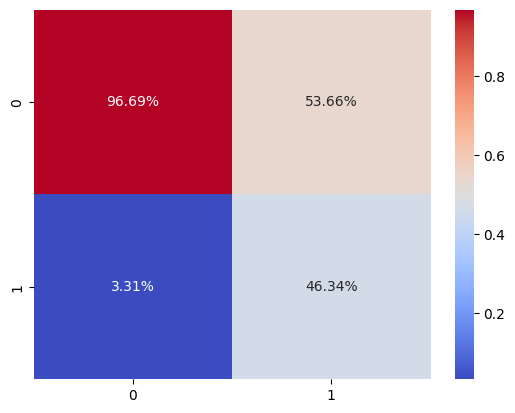

In [ ]:
%%time

parameters = {'alpha': np.linspace(2.78, 2.79, 100)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

### **S4 (88% vs 12%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9463681592039801


Migliori parametri: {'C': 0.0006210526315789474}
ROC AUC: 0.9565972222222223
Accuracy: 0.9114583333333334
F1-score: 0.6909090909090909
Precision: 0.6129032258064516
Recall: 0.7916666666666666
CPU times: user 3min 3s, sys: 137 ms, total: 3min 3s
Wall time: 3min 3s


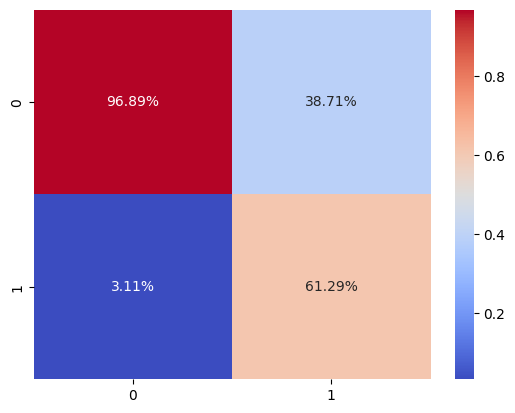

In [ ]:
%%time
parameters = {'C': np.linspace(1e-4, 0.01, 20)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

#### *Polinomiale*

In [ ]:
%%time
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9473778167983612
CPU times: user 27.2 s, sys: 19.6 ms, total: 27.2 s
Wall time: 27.3 s


In [ ]:
np.linspace(1.77, 1.99, 5)

array([1.77 , 1.825, 1.88 , 1.935, 1.99 ])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Migliori parametri: {'C': 1.825, 'degree': 3}
ROC AUC: 0.9377480158730158
Accuracy: 0.875
F1-score: 0.0
Precision: 0.0
Recall: 0.0
CPU times: user 6min 45s, sys: 340 ms, total: 6min 46s
Wall time: 6min 47s


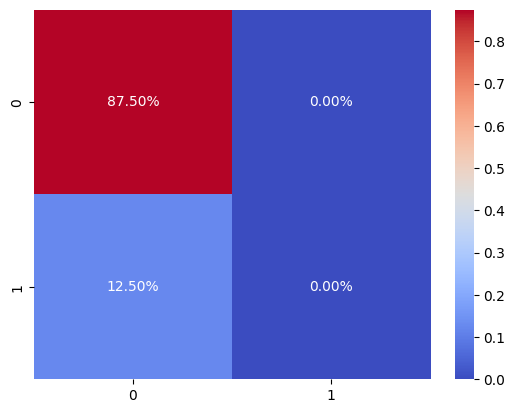

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(1.77, 1.88, 5)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']

# Addestro il modello con il miglior parametro
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])+ 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:
%%time
svm_rbf = SVC(C = 0.3, kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9498102624134231
CPU times: user 24.9 s, sys: 33.4 ms, total: 25 s
Wall time: 25 s


In [ ]:
np.linspace(1e-10, 3, 10)

array([1.00000000e-10, 3.33333333e-01, 6.66666667e-01, 1.00000000e+00,
       1.33333333e+00, 1.66666667e+00, 2.00000000e+00, 2.33333333e+00,
       2.66666667e+00, 3.00000000e+00])

Migliori parametri: {'C': 2.0377777777777775}
ROC AUC: 0.9660218253968254
Accuracy: 0.9270833333333334
F1-score: 0.611111111111111
Precision: 0.9166666666666666
Recall: 0.4583333333333333
CPU times: user 3min 13s, sys: 240 ms, total: 3min 13s
Wall time: 3min 13s


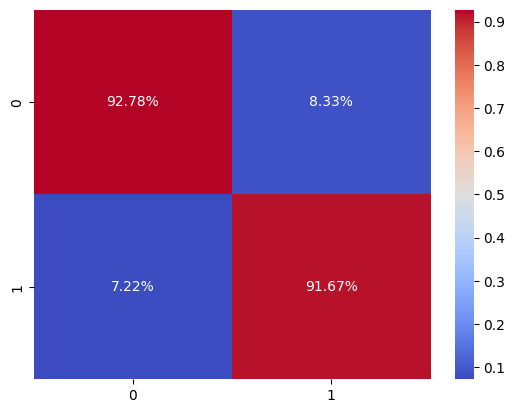

In [ ]:
%%time
parameters = {'C': np.linspace(1.66, 2.34, 10)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']
#svm_rbf.gamma = grid_search.best_params_['gamma']

# Addestro il modello con il miglior parametro
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

### **S4 (88% vs 12%) 5. LDA**

In [ ]:
%%time
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9514915617988489
CPU times: user 3min 12s, sys: 16.1 s, total: 3min 28s
Wall time: 2min 8s


In [ ]:
np.linspace(0.1, 1, 5)

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

Migliori parametri: {'shrinkage': 0.55}
ROC AUC: 0.9538690476190477
Accuracy: 0.9479166666666666
F1-score: 0.7916666666666666
Precision: 0.7916666666666666
Recall: 0.7916666666666666
CPU times: user 14min 50s, sys: 1min 5s, total: 15min 56s
Wall time: 9min 35s


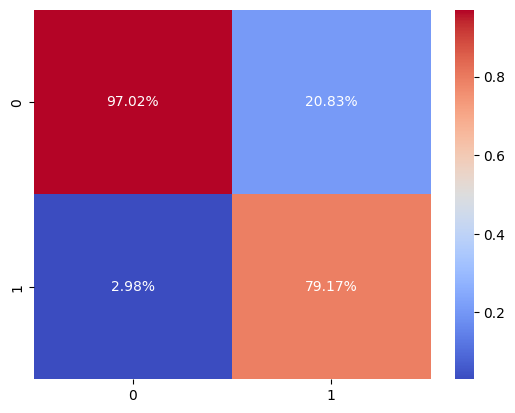

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(0.325, 0.775, 5)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']

# Addestro il modello con il miglior parametro
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

# Paziente S4 - dati unbalanced (70% vs 30%)

## Definizione dei Dataset

Suddivisione dei dati tra set di training, set di validazione e set di test e bilanciamento dei dati

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 30/70, random_state = 42)
X_train, y_train = undersampler.fit_resample(X_train_original, y_train_original)

class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  70.0 % e quella di T è 30.0 %. E in termini assoluti: Counter({0: 224, 1: 96})


## **Model selection**

### **S4 (70% vs 30%) 1. Logistic Regression**

In [ ]:
LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.9277448397013615


Cerco i migliori parameti con Grid search

Migliori parametri: {'C': 0.15666666666666668}
ROC AUC: 0.9352678571428572
Accuracy: 0.9010416666666666
F1-score: 0.6984126984126983
Precision: 0.5641025641025641
Recall: 0.9166666666666666
CPU times: user 15.6 s, sys: 5.76 s, total: 21.4 s
Wall time: 13.2 s


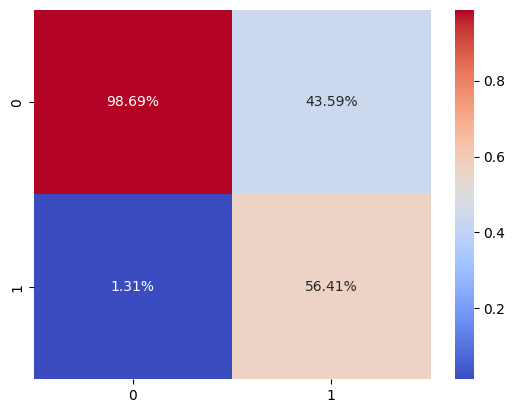

In [ ]:
%%time
parameters = {'C': np.linspace(0.15, 0.16, 10)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)
S4_result = np.vstack((S4_result, metrics))

### **S4 (70% vs 30%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9301185770750988
CPU times: user 9.03 s, sys: 22.1 ms, total: 9.05 s
Wall time: 9.15 s


In [ ]:
np.linspace(80, 150, 35).astype(int)

array([ 80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 115, 117, 119, 121, 123, 125, 127, 129, 131,
       133, 135, 137, 139, 141, 143, 145, 147, 150])

Migliori parametri: {'n_estimators': 118}
ROC AUC: 0.908234126984127
Accuracy: 0.8958333333333334
F1-score: 0.5238095238095238
Precision: 0.6111111111111112
Recall: 0.4583333333333333
CPU times: user 33 s, sys: 119 ms, total: 33.1 s
Wall time: 33.2 s


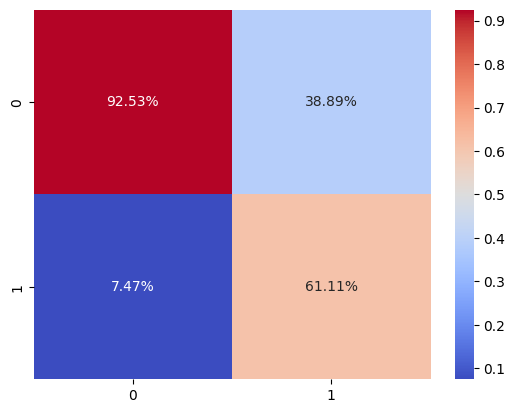

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(118, 120, 3).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

### **S4 (70% vs 30%) 3. Naive Bayes**

Traslazione dei dati per rendere positivi i valori per il Naive Bayes

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 30/70, random_state = 42)
X_bayes_train, y_bayes_train = undersampler.fit_resample(X_bayes_train_original, y_bayes_train_original)

class_counter = Counter(y_bayes_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_bayes_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  70.0 % e quella di T è 30.0 %. E in termini assoluti: Counter({0: 224, 1: 96})


#### *MultiNB*

In [ ]:
%%time
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.9162790953008344
CPU times: user 116 ms, sys: 67.8 ms, total: 184 ms
Wall time: 106 ms


Migliori parametri: {'alpha': 1e-08}
ROC AUC: 0.9021577380952381
Accuracy: 0.8489583333333334
F1-score: 0.5396825396825398
Precision: 0.4358974358974359
Recall: 0.7083333333333334
CPU times: user 10.7 s, sys: 6.29 s, total: 16.9 s
Wall time: 10.8 s


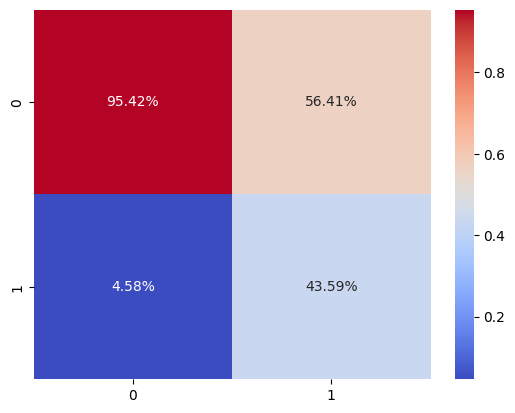

In [ ]:
%%time

# GridSearchCV
parameters = {'alpha': np.linspace(1e-8, 0.01, 100)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

best_alpha_M = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Multi_NB = MultinomialNB(alpha = best_alpha_M)
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

#### *Complement NB*

In [ ]:
%%time
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.9162790953008344
CPU times: user 110 ms, sys: 56.9 ms, total: 167 ms
Wall time: 87 ms


Migliori parametri: {'alpha': 1e-08}
ROC AUC: 0.9021577380952381
Accuracy: 0.8489583333333334
F1-score: 0.5396825396825398
Precision: 0.4358974358974359
Recall: 0.7083333333333334
CPU times: user 10.6 s, sys: 6.33 s, total: 16.9 s
Wall time: 9.75 s


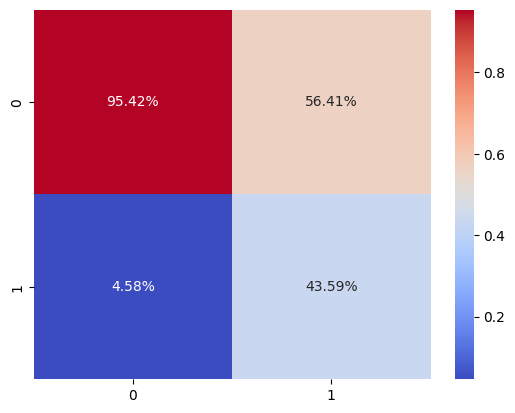

In [ ]:
%%time

parameters = {'alpha': np.linspace(1e-8, 0.01, 100)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

### **S4 (70% vs 30%) 4. SVM**

*Lineare*

In [ ]:
svm_linear = SVC(kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9264097496706192


Migliori parametri: {'C': 0.0006210526315789474}
ROC AUC: 0.9422123015873016
Accuracy: 0.8958333333333334
F1-score: 0.6874999999999999
Precision: 0.55
Recall: 0.9166666666666666
CPU times: user 55.1 s, sys: 101 ms, total: 55.2 s
Wall time: 55.5 s


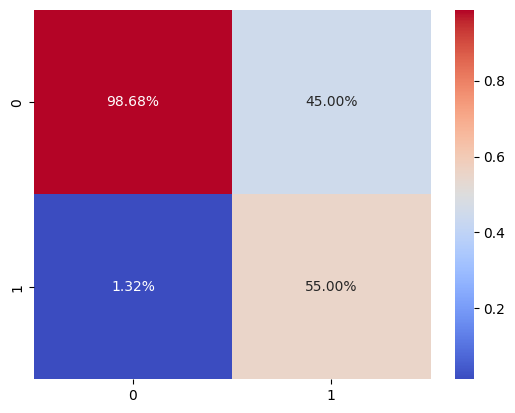

In [ ]:
%%time
parameters = {'C': np.linspace(1e-4, 0.01, 20)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

*Polinomiale*

In [ ]:
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9348462889767237


In [ ]:
np.linspace(1, 1.7, 10)

array([1.        , 1.07777778, 1.15555556, 1.23333333, 1.31111111,
       1.38888889, 1.46666667, 1.54444444, 1.62222222, 1.7       ])

Migliori parametri: {'C': 1.1877777777777778, 'degree': 3}
ROC AUC: 0.9372519841269842
Accuracy: 0.8958333333333334
F1-score: 0.2857142857142857
Precision: 1.0
Recall: 0.16666666666666666
CPU times: user 2min 20s, sys: 175 ms, total: 2min 20s
Wall time: 2min 20s


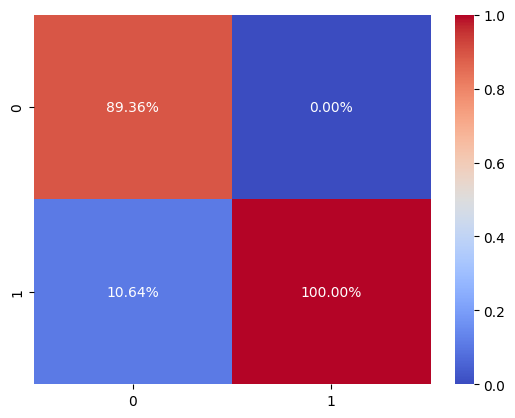

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(1.15, 1.32, 10)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']

# Addestro il modello con il miglior parametro
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

*Radial Basis Function (RBF)*

In [ ]:
svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9401602986385595


In [ ]:
np.linspace(1.532, 1.623, 10)

array([1.532     , 1.54211111, 1.55222222, 1.56233333, 1.57244444,
       1.58255556, 1.59266667, 1.60277778, 1.61288889, 1.623     ])

Migliori parametri: {'C': 1.568421052631579}
ROC AUC: 0.953125
Accuracy: 0.9114583333333334
F1-score: 0.6382978723404256
Precision: 0.6521739130434783
Recall: 0.625
CPU times: user 1min 45s, sys: 164 ms, total: 1min 45s
Wall time: 1min 46s


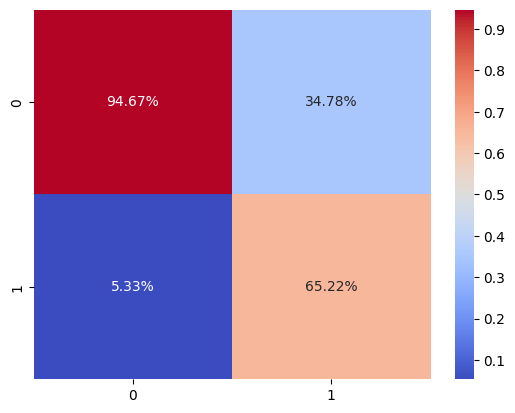

In [ ]:
%%time
parameters = {'C': np.linspace(1.56, 1.58, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

### **S4 (70% vs 30%) 5. LDA**

In [ ]:
%%time
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9068906455862977
CPU times: user 3min 2s, sys: 14.5 s, total: 3min 17s
Wall time: 1min 58s


In [ ]:
np.linspace(0.1, 1, 5)

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

Migliori parametri: {'shrinkage': 0.8875}
ROC AUC: 0.9342757936507937
Accuracy: 0.8958333333333334
F1-score: 0.6774193548387096
Precision: 0.5526315789473685
Recall: 0.875
CPU times: user 15min 5s, sys: 1min 6s, total: 16min 11s
Wall time: 9min 42s


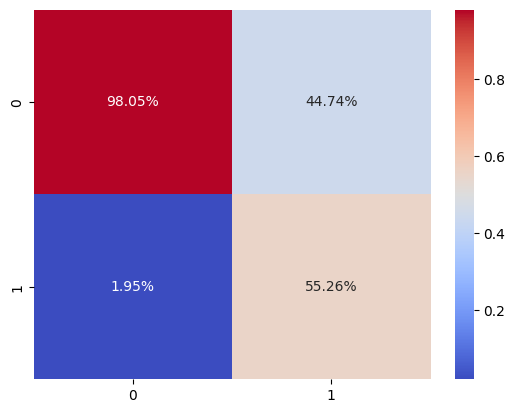

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(0.55, 1, 5)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']

# Addestro il modello con il miglior parametro
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

In [ ]:
S4_result.shape

(16, 5)

# Paziente S4 - dati unbalanced (60% vs 40%)

## Definizione dei Dataset

Suddivisione dei dati tra set di training, set di validazione e set di test e bilanciamento dei dati

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 40/60, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train_original, y_train_original)

class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  60.0 % e quella di T è 40.0 %. E in termini assoluti: Counter({0: 144, 1: 96})


## **Model selection**

### **S4 (60% vs 40%) 1. Logistic Regression**

In [ ]:
%%time
LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.931957671957672
CPU times: user 1.47 s, sys: 739 ms, total: 2.21 s
Wall time: 1.36 s


Cerco i migliori parameti con Grid search

Migliori parametri: {'C': 0.0010526405263157894}
ROC AUC: 0.9459325396825397
Accuracy: 0.90625
F1-score: 0.6896551724137931
Precision: 0.5882352941176471
Recall: 0.8333333333333334
CPU times: user 11.9 s, sys: 6.14 s, total: 18 s
Wall time: 13.4 s


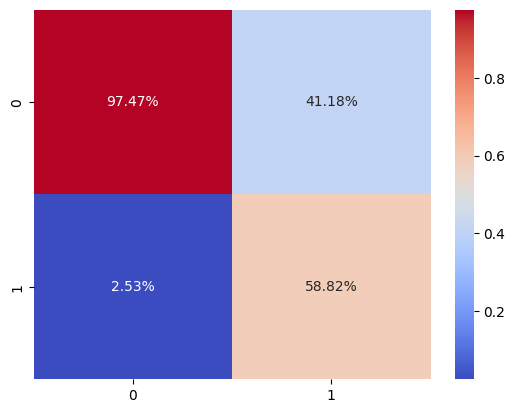

In [ ]:
%%time
parameters = {'C': np.linspace(1e-8, 0.01, 20)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)
S4_result = np.vstack((S4_result, metrics))

### **S4 (60% vs 40%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9420502645502646
CPU times: user 5.52 s, sys: 12 ms, total: 5.53 s
Wall time: 5.55 s


In [ ]:
np.linspace(80, 150, 35).astype(int)

array([ 80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 115, 117, 119, 121, 123, 125, 127, 129, 131,
       133, 135, 137, 139, 141, 143, 145, 147, 150])

Migliori parametri: {'n_estimators': 137}
ROC AUC: 0.9005456349206349
Accuracy: 0.8854166666666666
F1-score: 0.5599999999999999
Precision: 0.5384615384615384
Recall: 0.5833333333333334
CPU times: user 43.4 s, sys: 182 ms, total: 43.6 s
Wall time: 43.7 s


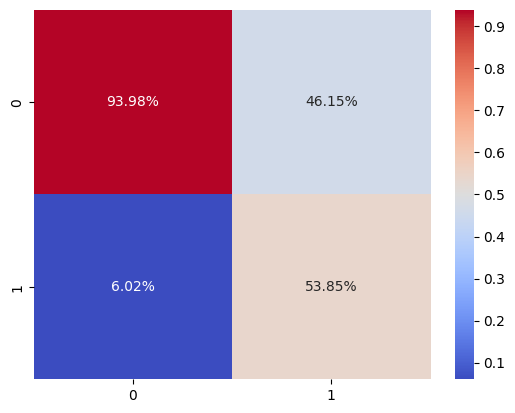

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(137, 141, 5).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

### **S4 (60% vs 40%) 3. Naive Bayes**

Traslazione dei dati per rendere positivi i valori per il Naive Bayes

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 40/60, random_state = 42)
X_bayes_train, y_bayes_train = undersampler.fit_resample(X_bayes_train_original, y_bayes_train_original)

class_counter = Counter(y_bayes_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_bayes_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  60.0 % e quella di T è 40.0 %. E in termini assoluti: Counter({0: 144, 1: 96})


#### *MultiNB*

In [ ]:
%%time
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.9162790953008344
CPU times: user 96.4 ms, sys: 62.8 ms, total: 159 ms
Wall time: 91.9 ms


Migliori parametri: {'alpha': 1.145326633165829}
ROC AUC: 0.9055059523809524
Accuracy: 0.8385416666666666
F1-score: 0.5507246376811594
Precision: 0.4222222222222222
Recall: 0.7916666666666666
CPU times: user 18.7 s, sys: 11.1 s, total: 29.8 s
Wall time: 17.5 s


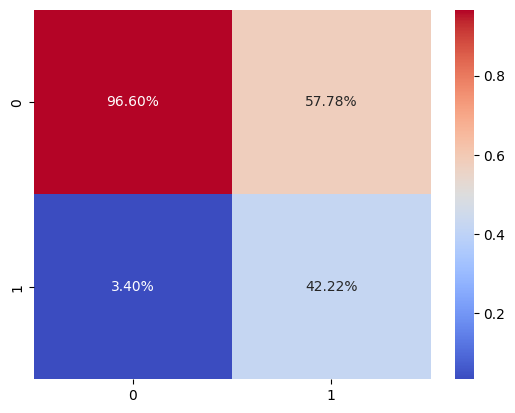

In [ ]:
%%time
# GridSearchCV
parameters = {'alpha': np.linspace(1.14, 1.15, 200)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

Multi_NB.alpha = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

#### *Complement NB*

In [ ]:
%%time
# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.921574074074074
CPU times: user 108 ms, sys: 87 ms, total: 195 ms
Wall time: 141 ms


Migliori parametri: {'alpha': 1.145326633165829}
ROC AUC: 0.9055059523809524
Accuracy: 0.8385416666666666
F1-score: 0.5507246376811594
Precision: 0.4222222222222222
Recall: 0.7916666666666666
CPU times: user 19.5 s, sys: 11.8 s, total: 31.2 s
Wall time: 20.2 s


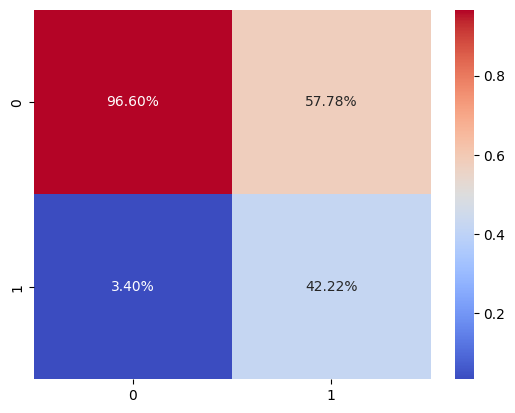

In [ ]:
%%time

parameters = {'alpha': np.linspace(1.14, 1.15, 200)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']

# Addestro il modello con il miglior parametro
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

### **S4 (60% vs 40%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(C = 2, kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9318783068783068


In [ ]:
np.linspace(0.001, 0.02, 4)

array([0.001     , 0.00733333, 0.01366667, 0.02      ])

Migliori parametri: {'C': 0.05644444444444444}
ROC AUC: 0.9149305555555556
Accuracy: 0.8333333333333334
F1-score: 0.5555555555555556
Precision: 0.4166666666666667
Recall: 0.8333333333333334
CPU times: user 20.7 s, sys: 68.7 ms, total: 20.8 s
Wall time: 20.8 s


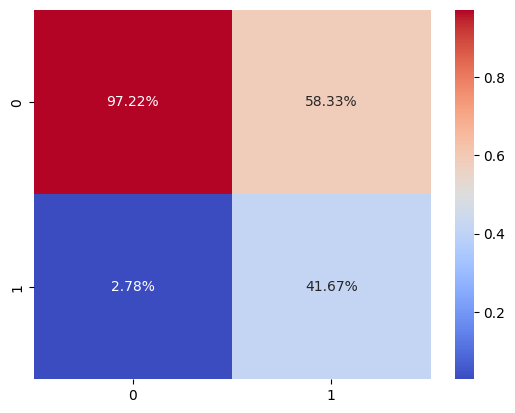

In [ ]:
%%time
parameters = {'C': np.linspace(0.001, 0.5, 10)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

#### *Polinomiale*

In [ ]:
svm_poli = SVC(kernel = 'poly', probability = True)

#scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9318783068783068


Migliori parametri: {'C': 1.3157894736842106, 'degree': 3}
ROC AUC: 0.9449404761904762
Accuracy: 0.921875
F1-score: 0.5454545454545454
Precision: 1.0
Recall: 0.375
CPU times: user 2min 41s, sys: 206 ms, total: 2min 41s
Wall time: 2min 42s


0.9360119047619049

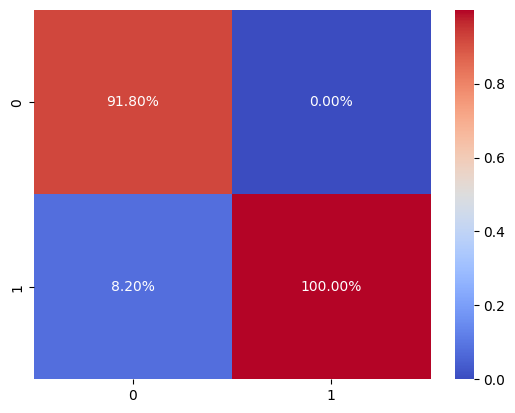

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(1, 3, 20)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)
0.9360119047619049

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

*Radial Basis Function (RBF)*

In [ ]:
svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.946984126984127


Migliori parametri: {'C': 1.894736842105263}
ROC AUC: 0.9595734126984127
Accuracy: 0.9166666666666666
F1-score: 0.7142857142857143
Precision: 0.625
Recall: 0.8333333333333334
CPU times: user 1min 3s, sys: 106 ms, total: 1min 3s
Wall time: 1min 3s


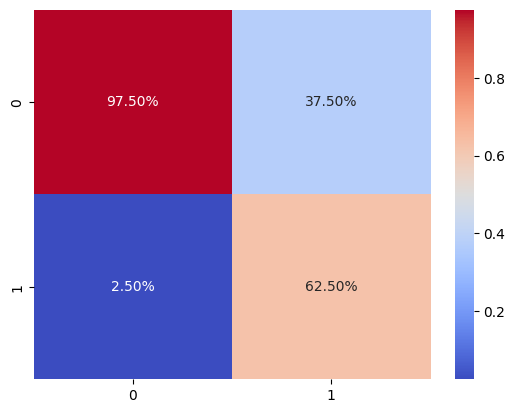

In [ ]:
%%time
parameters = {'C': np.linspace(1, 2, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']

# Addestro il modello con il miglior parametro
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

### **S4 (60% vs 40%) 5. LDA**

In [ ]:
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9135978835978836


Migliori parametri: {'shrinkage': 0.94375}
ROC AUC: 0.9409722222222221
Accuracy: 0.8802083333333334
F1-score: 0.6567164179104478
Precision: 0.5116279069767442
Recall: 0.9166666666666666
CPU times: user 15min 40s, sys: 1min 8s, total: 16min 48s
Wall time: 10min 5s


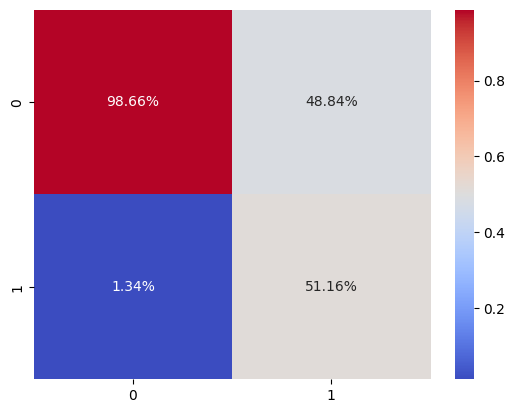

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(0.775, 1, 5)}

grid_search = GridSearchCV(lda, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']

# Addestro il modello con il miglior parametro
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

In [ ]:
S4_result.shape

(24, 5)

# Paziente S4 - dati unbalanced (50% vs 50%)

## Definizione dei Dataset

Suddivisione dei dati tra set di training, set di validazione e set di test e bilanciamento dei dati

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
X_train, y_train = undersampler.fit_resample(X_train_original, y_train_original)

class_counter = Counter(y_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  50.0 % e quella di T è 50.0 %. E in termini assoluti: Counter({0: 96, 1: 96})


## **Model selection**

### **S4 (50% vs 50%) 1. Logistic Regression**

In [ ]:
%%time

LR = LogisticRegression(max_iter = 1000)

scores = cross_val_score(LR, X_train, y_train, cv = cv, scoring = 'f1')
ROC_mean = scores.mean()

print("ROC (cross-validation): ", ROC_mean)

ROC (cross-validation):  0.8855388471177946
CPU times: user 984 ms, sys: 543 ms, total: 1.53 s
Wall time: 955 ms


Cerco i migliori parameti con Grid search

Migliori parametri: {'C': 0.014736842105263158}
ROC AUC: 0.9231150793650793
Accuracy: 0.8541666666666666
F1-score: 0.611111111111111
Precision: 0.4583333333333333
Recall: 0.9166666666666666
CPU times: user 12.7 s, sys: 6.37 s, total: 19.1 s
Wall time: 11.9 s


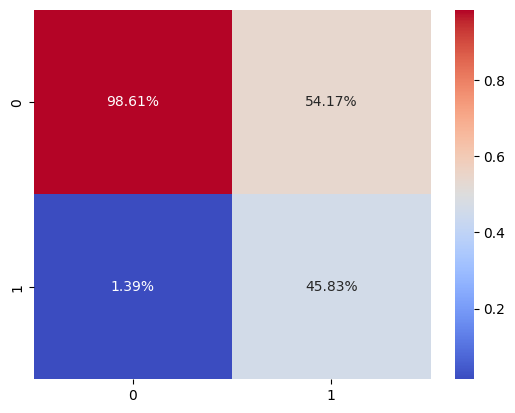

In [ ]:
%%time
parameters = {'C': np.linspace(0.01, 0.02, 20)}
grid_search = GridSearchCV(LR, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

LR.C = grid_search.best_params_['C']
LR.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = LR.predict_proba(X_val)[0:,1]
y_pred = LR.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = LR.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)
S4_result = np.vstack((S4_result, metrics))

### **S4 (50% vs 50%) 2. Random Forest**

In [ ]:
%%time
RF = RandomForestClassifier(criterion = 'gini')

scores = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9481111111111111
CPU times: user 5.37 s, sys: 14 ms, total: 5.38 s
Wall time: 5.45 s


In [ ]:
np.linspace(80, 150, 35).astype(int)

array([ 80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 115, 117, 119, 121, 123, 125, 127, 129, 131,
       133, 135, 137, 139, 141, 143, 145, 147, 150])

Migliori parametri: {'n_estimators': 96}
ROC AUC: 0.8892609126984127
Accuracy: 0.828125
F1-score: 0.5074626865671642
Precision: 0.3953488372093023
Recall: 0.7083333333333334
CPU times: user 23.7 s, sys: 112 ms, total: 23.8 s
Wall time: 23.8 s


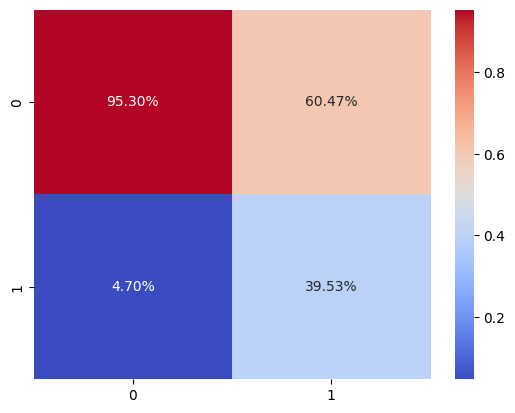

In [ ]:
%%time
parameters = {'n_estimators': np.linspace(96, 100, 5).astype(int)}

grid_search = GridSearchCV(RF, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

RF.n_estimators = grid_search.best_params_['n_estimators']
RF.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = RF.predict_proba(X_val)[0:,1]
y_pred = RF.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = RF.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

### **S4 (50% vs 50%) 3. Naive Bayes**

Traslazione dei dati per rendere positivi i valori per il Naive Bayes

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
X_bayes_train, y_bayes_train = undersampler.fit_resample(X_bayes_train_original, y_bayes_train_original)

class_counter = Counter(y_bayes_train)
first_class, count = class_counter.most_common(1)[0]
NT_perc = (count/ len(y_bayes_train)) * 100
print("La parecentuale di dati di training NT è ", NT_perc, "% e quella di T è", 100 - NT_perc , "%. E in termini assoluti:", class_counter)

La parecentuale di dati di training NT è  50.0 % e quella di T è 50.0 %. E in termini assoluti: Counter({0: 96, 1: 96})


#### *MultiNB*

In [ ]:
Multi_NB = MultinomialNB()

# Valutazione tramite validazione incrociata (cross-validation)
scores = cross_val_score(Multi_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC score medio (cross-validation):", mean_ROC)

ROC score medio (cross-validation): 0.9316666666666666


Migliori parametri: {'alpha': 1644.6761779946628}
ROC AUC: 0.9050099206349206
Accuracy: 0.5833333333333334
F1-score: 0.375
Precision: 0.23076923076923078
Recall: 1.0
CPU times: user 18.1 s, sys: 10.9 s, total: 29 s
Wall time: 18.3 s


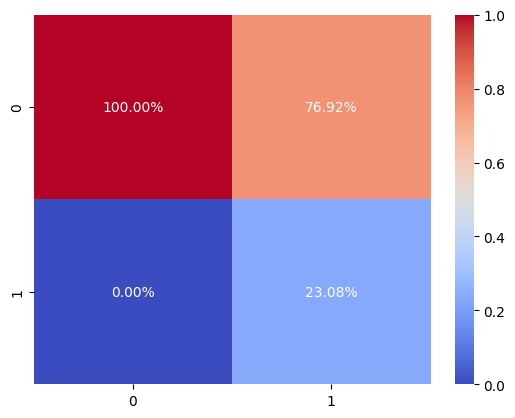

In [ ]:
%%time
# GridSearchCV
parameters = {'alpha': np.logspace(2, 4, 200)}
grid_search = GridSearchCV(Multi_NB, parameters, cv = cv, scoring = 'roc_auc')

# grid search sul training set
grid_search.fit(X_bayes_train, y_bayes_train)

Multi_NB.alpha = grid_search.best_params_['alpha']
Multi_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Multi_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Multi_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Multi_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

#### *Complement NB*

In [ ]:
%%time
Compl_NB = ComplementNB()

# Cross-validation
scores = cross_val_score(Compl_NB, X_bayes_train, y_bayes_train, cv = cv, scoring = 'roc_auc')

# ROC medio dei risultati
mean_ROC = np.mean(scores)

print("ROC Auc (cross-validation):", mean_ROC)

ROC Auc (cross-validation): 0.9316666666666666
CPU times: user 96.3 ms, sys: 38.9 ms, total: 135 ms
Wall time: 111 ms


Migliori parametri: {'alpha': 1644.6761779946644}
ROC AUC: 0.9050099206349206
Accuracy: 0.5833333333333334
F1-score: 0.375
Precision: 0.23076923076923078
Recall: 1.0
CPU times: user 18.7 s, sys: 11.5 s, total: 30.1 s
Wall time: 18.3 s


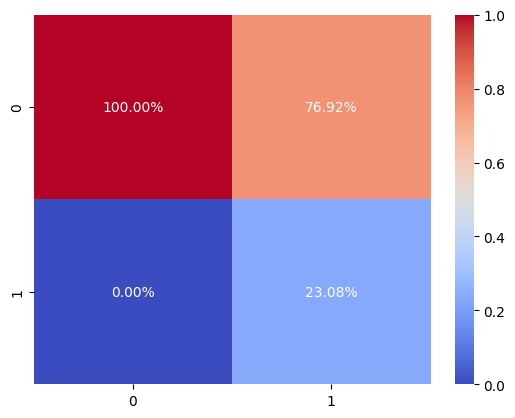

In [ ]:
%%time
parameters = {'alpha': np.logspace(3, 4, 200)}
grid_search = GridSearchCV(Compl_NB, parameters, cv = cv, scoring = 'roc_auc')

grid_search.fit(X_bayes_train, y_bayes_train)

Compl_NB.alpha = grid_search.best_params_['alpha']
Compl_NB.fit(X_bayes_train, y_bayes_train)

# Predizioni sul set di validazione
y_pred_prob = Compl_NB.predict_proba(X_bayes_val)[:,1]
y_pred = Compl_NB.predict(X_bayes_val)

roc_auc = roc_auc_score(y_bayes_val, y_pred_prob)
accuracy = accuracy_score(y_bayes_val, y_pred)
f1 = f1_score(y_bayes_val, y_pred)
precision = precision_score(y_bayes_val, y_pred)
recall = recall_score(y_bayes_val, y_pred)

cf_matrix = confusion_matrix(y_bayes_val, y_pred, labels = Compl_NB.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')


print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

### **S4 (50% vs 50%) 4. SVM**

#### *Lineare*

In [ ]:
svm_linear = SVC(C = 10000, kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)

#scores = cross_val_score(svm_linear, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9316666666666666


Migliori parametri: {'C': 0.0004736894736842105}
ROC AUC: 0.9288194444444444
Accuracy: 0.8645833333333334
F1-score: 0.6285714285714286
Precision: 0.4782608695652174
Recall: 0.9166666666666666
CPU times: user 26.2 s, sys: 73.1 ms, total: 26.3 s
Wall time: 26.3 s


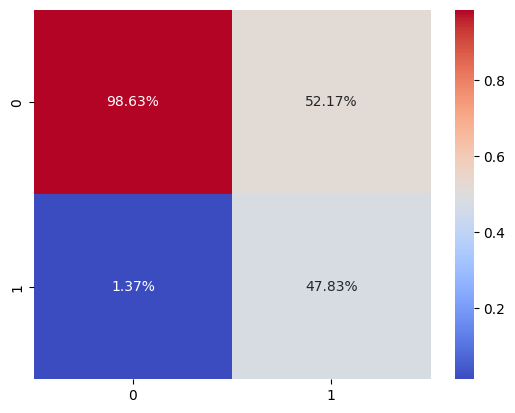

In [ ]:
%%time
parameters = {'C': np.linspace(1e-8, 0.001, 20)}

grid_search = GridSearchCV(svm_linear, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_linear.C = grid_search.best_params_['C']
svm_linear.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_linear.predict_proba(X_val)[0:,1]
y_pred = svm_linear.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_linear.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

#### *Polinomiale*

In [ ]:
svm_poli = SVC(kernel = 'poly', probability = True)

scores = cross_val_score(svm_poli, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9572222222222223


In [ ]:
np.linspace(0.001, 3, 10)

array([1.00000000e-03, 3.34222222e-01, 6.67444444e-01, 1.00066667e+00,
       1.33388889e+00, 1.66711111e+00, 2.00033333e+00, 2.33355556e+00,
       2.66677778e+00, 3.00000000e+00])

Migliori parametri: {'C': 1.037777777777778, 'degree': 3}
ROC AUC: 0.9263392857142858
Accuracy: 0.8802083333333334
F1-score: 0.5818181818181819
Precision: 0.5161290322580645
Recall: 0.6666666666666666
CPU times: user 52.5 s, sys: 109 ms, total: 52.6 s
Wall time: 53 s


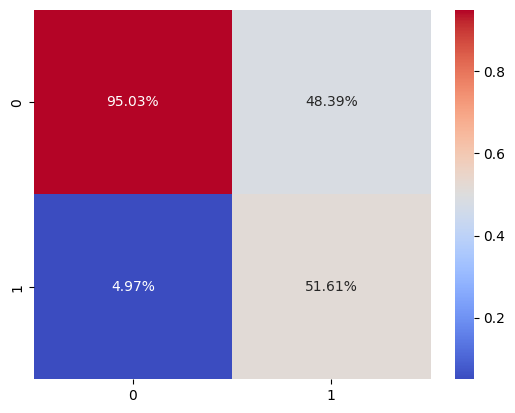

In [ ]:
%%time
parameters = {'degree': [2, 3, 4], 'C': np.linspace(0.66, 1.34, 10)}

grid_search = GridSearchCV(svm_poli, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_poli.C = grid_search.best_params_['C']
svm_poli.degree = grid_search.best_params_['degree']
svm_poli.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_poli.predict_proba(X_val)[0:,1]
y_pred = svm_poli.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_poli.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

#### *Radial Basis Function (RBF)*

In [ ]:
svm_rbf = SVC(kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

scores = cross_val_score(svm_rbf, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9630000000000001


Migliori parametri: {'C': 1.3157894736842106}
ROC AUC: 0.9389880952380951
Accuracy: 0.8541666666666666
F1-score: 0.611111111111111
Precision: 0.4583333333333333
Recall: 0.9166666666666666
CPU times: user 40.7 s, sys: 88.8 ms, total: 40.8 s
Wall time: 40.9 s


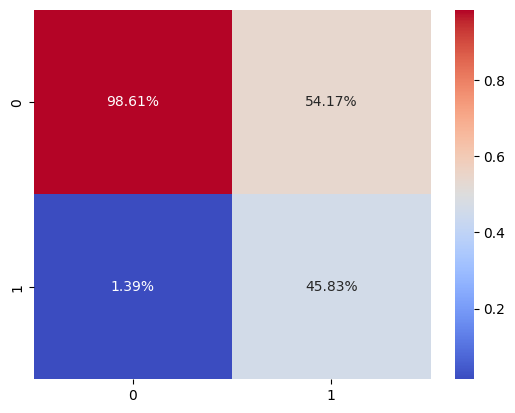

In [ ]:
%%time
parameters = {'C': np.linspace(1, 2, 20)}

grid_search = GridSearchCV(svm_rbf, parameters, cv = cv, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

svm_rbf.C = grid_search.best_params_['C']
svm_rbf.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = svm_rbf.predict_proba(X_val)[0:,1]
y_pred = svm_rbf.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = svm_rbf.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

### **S4 (50% vs 50%) 5. LDA**

In [ ]:
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')

scores = cross_val_score(lda, X_train, y_train, cv = cv, scoring = 'roc_auc')
ROC_mean = scores.mean()

print("ROC score medio (cross validation): ", ROC_mean)

ROC score medio (cross validation):  0.9573333333333334


Migliori parametri: {'shrinkage': 0.94375}
ROC AUC: 0.9222470238095238
Accuracy: 0.84375
F1-score: 0.5945945945945945
Precision: 0.44
Recall: 0.9166666666666666
CPU times: user 7min 54s, sys: 34.1 s, total: 8min 28s
Wall time: 5min 6s


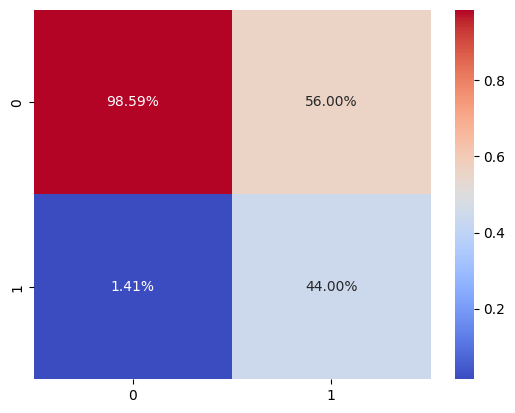

In [ ]:
%%time
parameters = {'shrinkage' : np.linspace(0.775, 1, 5)}

grid_search = GridSearchCV(lda, parameters, cv = 5, scoring = 'roc_auc')

# Grid search sul training set
grid_search.fit(X_train, y_train)

lda.shrinkage = grid_search.best_params_['shrinkage']
lda.fit(X_train, y_train)

# Predizioni sul set di validazione
y_pred_prob = lda.predict_proba(X_val)[0:,1]
y_pred = lda.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_prob)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

cf_matrix = confusion_matrix(y_val, y_pred, labels = lda.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j])))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("Migliori parametri:", grid_search.best_params_)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
metrics = np.array(roc_auc)
metrics = np.append(metrics, accuracy)
metrics = np.append(metrics, f1)
metrics = np.append(metrics, precision)
metrics = np.append(metrics, recall)

S4_result = np.vstack((S4_result, metrics))

In [ ]:
S4_result.shape

(32, 5)

# Salvataggio dei Risultati

In [ ]:
path_data = '/content/drive/MyDrive/Colab Notebooks/data/DataMiningProject/Results'
file_path = os.path.join(path_mount, path_data, subject)
np.save(file_path + "_results", S4_result)
print(file_path)

/content/drive/MyDrive/Colab Notebooks/data/DataMiningProject/Results/S4
